In [1]:
from cmath import *
import matplotlib.pyplot as plt
from IPython.display import SVG
import numpy as np

<h1 align="center"> Задача №1. Осевое растяжение-сжатие </h1>

Расчёт выполнен в программе Jupiter Notebook. Язык программирования Python 3.

<h2> 1. Исходные данные </h2>

<h3> Вариант №21 </h3>
<h3> Тимофеев М.В., ПГС-17 </h3>

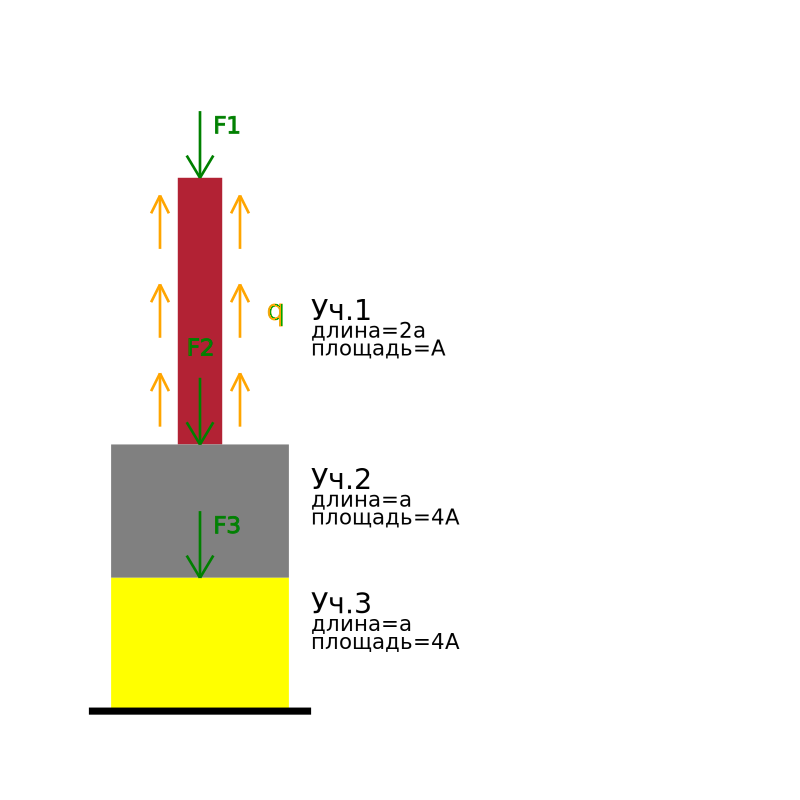

In [2]:
# Отображение расчётной схемы
def show_svg(file_name):
    return SVG(filename=file_name)
show_svg('1_Jupiter/Scheme_1.svg')

In [3]:
F1 = -120.e3  # Н
F2 = -80.e3  # Н
F3 = -150.e3  # Н
a = 1.  # м
l_1 = 2.*a
l_2 = 1.*a
l_3 = 1.*a
q = 20.e3  # Н/м
# Материал: бетон
Rc = 12.e6  # Па
Rt = 0.9e6  # Па
E = 15.e9  # Па

<h2> 2. Построение эпюры N </h2>

Продольное усилие на Участке №1 (начало и конец):

In [4]:
N_1 = [0, 0]
N_1[0] = F1
N_1[1] = N_1[0] + q*l_1
N_1  

[-120000.0, -80000.0]

Продольное усилие на Участке №2 (начало и конец):

In [5]:
N_2 = [0, 0]
N_2[0] = N_1[1] + F2
N_2[1] = N_2[0]
N_2

[-160000.0, -160000.0]

Продольное усилие на Участке №3 (начало и конец):

In [6]:
N_3 = [0, 0]
N_3[0] = N_2[1] + F3
N_3[1] = N_3[0]
N_3

[-310000.0, -310000.0]

Эпюра продольных усилий:

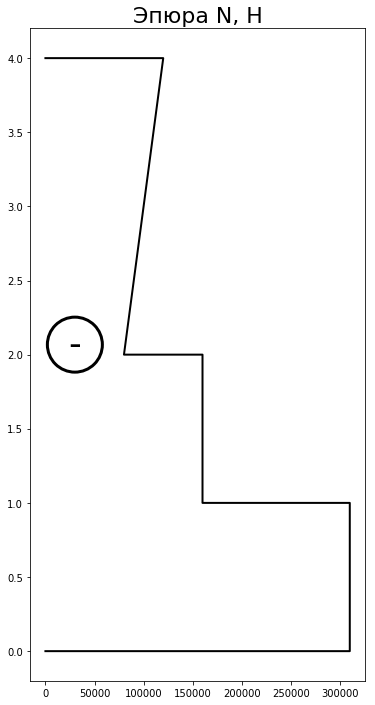

In [7]:
# Построение эпюры N
y = [0, 0, 1, 1, 2, 2, 4, 4]
x = [0, N_3[1],N_3[0], N_2[1], N_2[0], N_1[1], N_1[0], 0]
x = [abs(el) for el in x]

fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(12)
ax.plot(x, y, linestyle = '-', linewidth = 2, color = 'black')

box_2 = {'facecolor':'white',
         'edgecolor': 'black',
         'boxstyle': 'circle',
         'linestyle': '-',     #  начертание линии
         'linewidth': '3'}     #  толщина линии

ax.text(30000, 2, '-',
        bbox = box_2,
        horizontalalignment = 'center',    #  горизонтальное выравнивание
        color = 'black',
        fontsize = 35)

plt.title('Эпюра N, Н', fontsize=22)
plt.show()

<h2> 3. Определение требуемых площадей </h2>

Во всех участках - сжатие. Нас интересуют участки 1 и 3.
Условие определения площади
- Для участка 1: N_max_1уч / A >= Rс    ==> A = N_max_1уч / Rс
- Для участка 3: N_max_2уч / 4A >= Rс   ==> A = N_max_1уч / 4Rс

In [8]:
A_tr = max(abs(min(N_1)/Rc), abs(min(N_3)/(4*Rc)))
A_tr

0.01

Площади участков 1-3, м2:

In [9]:
A_1 = A_tr
A_2 = A_3 = 4*A_tr
A_1, A_2, A_3  # м2

(0.01, 0.04, 0.04)

<h2> 4. Построение эпюры нормальных напряжений </h2>

Нормальные напряжения на участке 1:

In [10]:
Sigma_1 = [0, 0]
Sigma_1[0] = N_1[0] / A_1
Sigma_1[1] = N_1[1] / A_1
Sigma_1

[-12000000.0, -8000000.0]

Нормальные напряжения на участке 2:

In [11]:
Sigma_2 = [0, 0]
Sigma_2[0] = N_2[0] / A_2
Sigma_2[1] = N_2[1] / A_2
Sigma_2

[-4000000.0, -4000000.0]

Нормальные напряжения на участке 3:

In [12]:
Sigma_3 = [0, 0]
Sigma_3[0] = N_3[0] / A_3
Sigma_3[1] = N_3[1] / A_3
Sigma_3

[-7750000.0, -7750000.0]

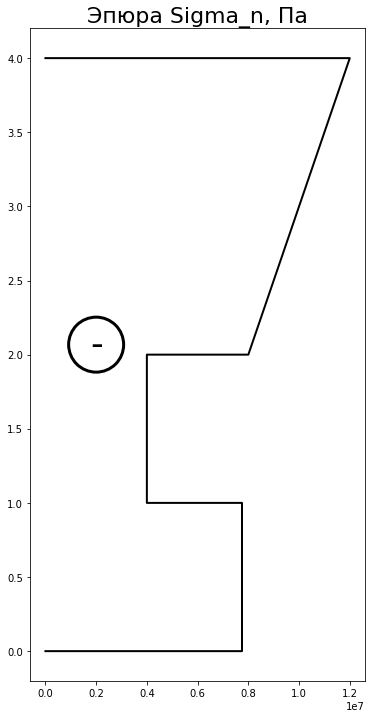

In [13]:
# Построение эпюры Sigma
y = [0, 0, 1, 1, 2, 2, 4, 4]
x = [0, Sigma_3[1],Sigma_3[0], Sigma_2[1], Sigma_2[0], Sigma_1[1], Sigma_1[0], 0]
x = [abs(el) for el in x]

fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(12)
ax.plot(x, y, linestyle = '-', linewidth = 2, color = 'black')

box_2 = {'facecolor':'white',
         'edgecolor': 'black',
         'boxstyle': 'circle',
         'linestyle': '-',     #  начертание линии
         'linewidth': '3'}     #  толщина линии

ax.text(2.e6, 2, '-',
        bbox = box_2,
        horizontalalignment = 'center',    #  горизонтальное выравнивание
        color = 'black',
        fontsize = 35)

plt.title('Эпюра Sigma_n, Па', fontsize=22)
plt.show()

<h2> 5. Определение деформации стержня </h2>

In [14]:
delta_1 = (N_1[0]*l_1 / (E*A_1) + 0.5*q*l_1**2./(E*A_1))
delta_1

-0.0013333333333333335

In [15]:
delta_2 = 0.5*(N_2[0] + N_2[1]) * l_2 / (E*A_2)
delta_2

-0.0002666666666666667

In [16]:
delta_3 = 0.5*(N_3[0] + N_3[1]) * l_3 / (E*A_3)
delta_3

-0.0005166666666666667

In [17]:
delta_sum = delta_1 + delta_2 + delta_3
delta_sum*1.e3  # мм

-2.1166666666666667

<h2> 6. Выводы: </h2>

1. Во всех участках наблюдается сжатие. Максимальное по модулю усилие - на 3-м участке и составляет 310 кН; </br>
2. Максимальное напряжение составляет 12 МПа;
3. Абсолютная линейная деформация стержня составляет 2.12 мм

<h2> 7. Проверочный расчёт с помощью Метода Конечных Элементов (МКЭ) </h2> 

Используем библиотеку <b> anastruct </b>

In [18]:
from anastruct import SystemElements

# Характеристики стержней
se = SystemElements(EA=1., EI=1.)

# Добавляем стержни
se.add_element(location=[[0, 0], [0, 1]], EA=4.*0.01*15.e9)
se.add_element(location=[[0, 1], [0, 2]], EA=4.*0.01*15.e9)
se.add_element(location=[[0, 2], [0, 4]], EA=1.*0.01*15.e9)

# Добавляем заделку
se.add_support_fixed(node_id=1)

# Добавляем нагрузки
se.point_load(Fy=F3, node_id=2)
se.point_load(Fy=F2, node_id=3)
se.point_load(Fy=F1, node_id=4)
se.q_load(q=q, element_id=3, direction='y')

# Выполняем расчёт
se.solve()

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.20474889e-11,
        5.16666667e-04,  9.46039652e-11, -1.74818330e-10,  7.83333333e-04,
        1.46039131e-10, -5.18331756e-10,  2.11666667e-03,  1.85227827e-10])

<h3> Отображение расчётной схемы: </h3>

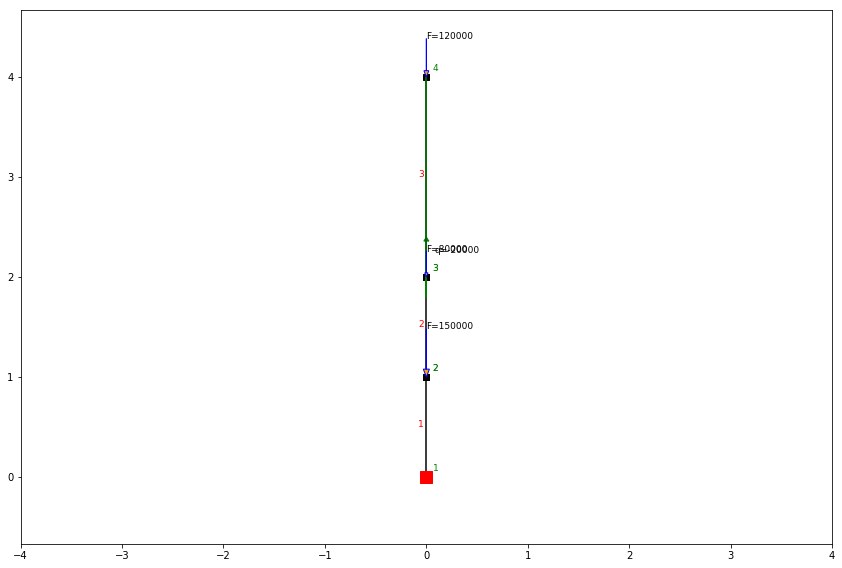

In [19]:
se.show_structure()

<h3> Реакция в опоре, Н: </h3>

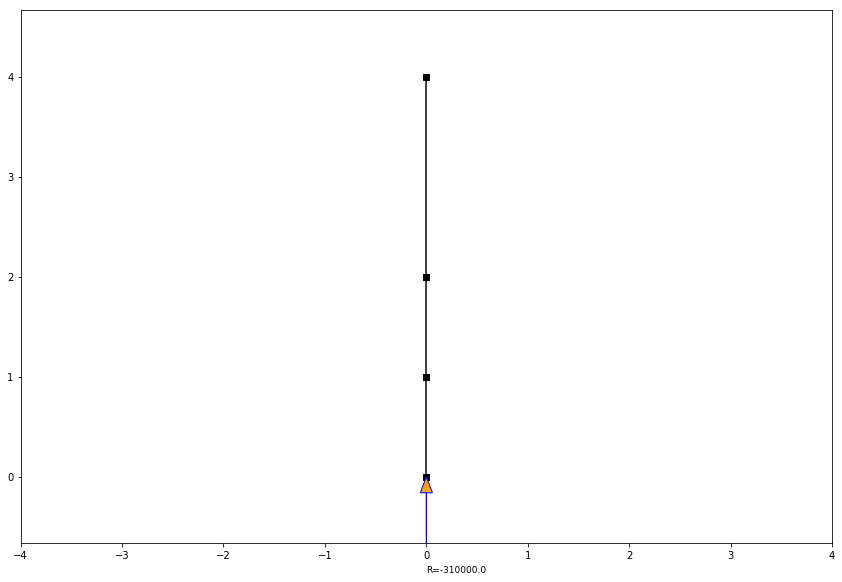

In [20]:
se.show_reaction_force()

<h3> Эпюра продольных усилий, Н: </h3>

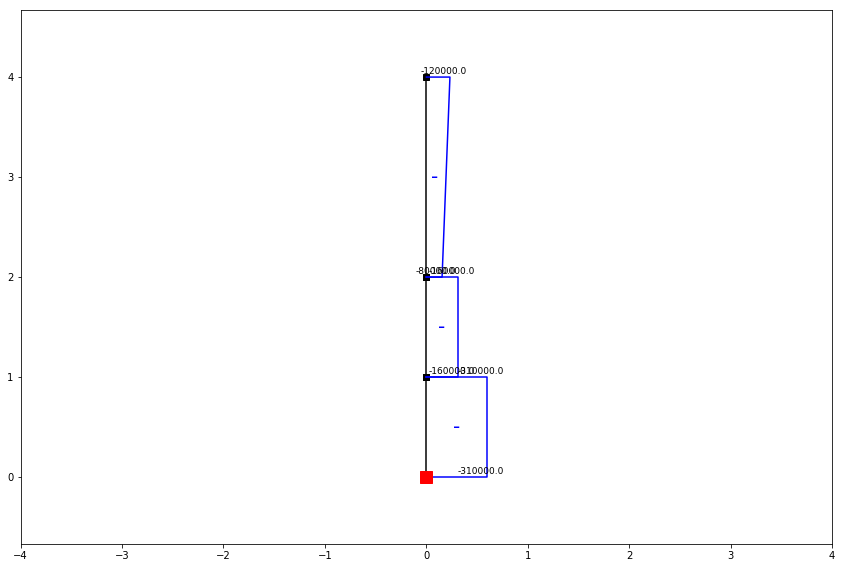

In [21]:
se.show_axial_force()

<h3> Перемещения, м: </h3>

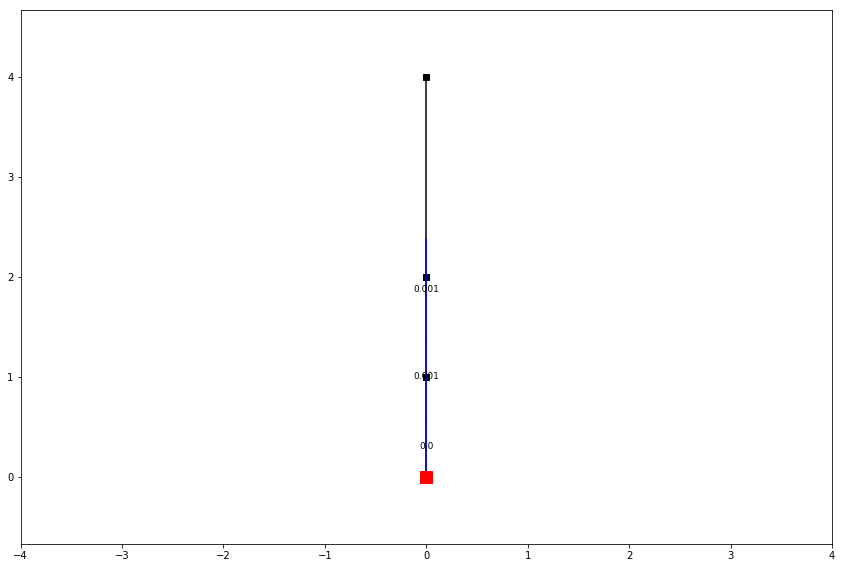

In [22]:
se.show_displacement()

Перемещения в узле 4 (верхний узел), м:

In [23]:
print(se.get_node_displacements(node_id=4)['uy'])

-0.002116666666666667


<h2> Заключение: результаты численного расчёта полностью совпали с результатами ручного расчёта как по усилиям, так и по перемещениям. </h2>